In [5]:
import cv2
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
class L1Dist(keras.layers.Layer):
    def __init__(self, **kwargs):
        super(L1Dist, self).__init__(**kwargs)

    def call(self, input_embedding, validation_embedding):
        return tf.math.abs(input_embedding[0] - validation_embedding[0])


In [24]:
model = keras.models.load_model('siamesemodel.keras', custom_objects={'L1Dist':L1Dist})

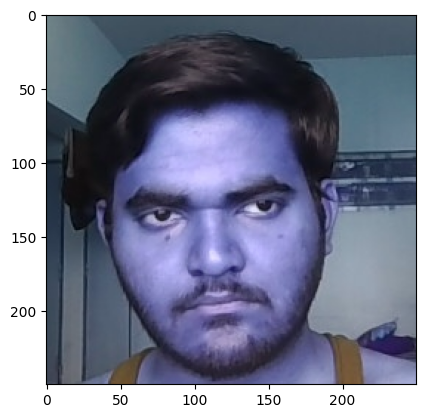

In [13]:
test_img = cv2.imread('./db/Om/9b9aa85c-f302-11ee-8bd9-973b43a59e11.jpg')
plt.imshow(test_img)

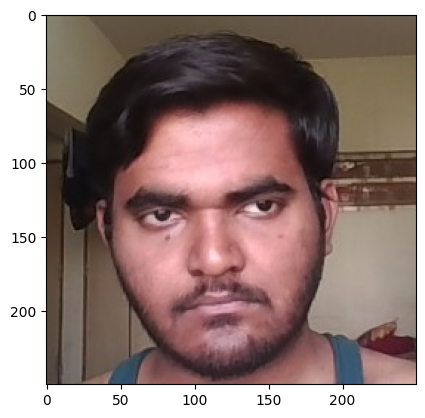

In [14]:
rgb = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)

In [30]:
def preprocess(file_path):
    
    # Read in image from file path
    byte_img = tf.io.read_file(file_path)
    # Load in the image 
    img = tf.io.decode_jpeg(byte_img)
    
    # Preprocessing steps - resizing the image to be 100x100x3
    img = tf.image.resize(img, (100,100))
    # Scale image to be between 0 and 1 
    img = img / 255.0
    img = tf.reshape(img,[-1,100,100,3])
    # Return image
    return img

In [31]:
img1 = preprocess('Om.jpg')
img2 = preprocess('Om2.jpg')

In [33]:
output = model.predict([img1,img2])[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


In [34]:
if output>0.5:
    print(True)
else:
    print(False)

True
